<a href="https://colab.research.google.com/github/JeongJeong-code/P6_market_place/blob/main/text_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from google.colab import files
import pandas as pd
import seaborn as sns
import os.path
import missingno as mi
import re
import sklearn as sk
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import homogeneity_score
from sklearn.decomposition import KernelPCA
from sklearn.cluster import (AgglomerativeClustering,
                             KMeans, DBSCAN, SpectralClustering)
from sklearn.metrics import davies_bouldin_score, silhouette_score
! {sys.executable} -m pip install ipynb
!pip install  opencv-python==3.4.2.17
!pip install  opencv-contrib-python==3.4.2.17
import cv2 as cv
from tqdm import tqdm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!python --version

Python 3.7.12


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
url = 'https://raw.githubusercontent.com/JeongJeong-code/P6_market_place/main/df_cat_prime.csv'
df1_test= pd.read_csv(url)
print(len(df1_test))
df1_test =df1_test[df1_test['image'] !='9743e6d1c9f3180483825fe4d2e97836.jpg']
print(len(df1_test))
df1_test.reset_index(inplace=True,drop=True)

1049
1048


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk.stem as stem
import string

In [7]:
df1_test.iloc[343]

Unnamed: 0                                                              344
product_name                   Anna Andre Paris Majesty Deodorant Combo Set
image                                  6e44d107ee32412243b19b0ed9b415f3.jpg
product_specifications    {"product_specification"=>[{"key"=>"Number of ...
categories                                         beauty and personal care
description               flipkart anna andre paris majesty deodorant co...
Name: 343, dtype: object

In [8]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              1048 non-null   int64 
 1   product_name            1048 non-null   object
 2   image                   1048 non-null   object
 3   product_specifications  1048 non-null   object
 4   categories              1048 non-null   object
 5   description             1048 non-null   object
dtypes: int64(1), object(5)
memory usage: 49.2+ KB


In [9]:
lemma=1
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stemmer = stem.PorterStemmer()
lemmatizer = stem.WordNetLemmatizer()
for i in range(len(df1_test)):
  df1_test.description[i] = nltk.word_tokenize(df1_test.description[i])
  if lemma ==1:
      df1_test.description[i] = [lemmatizer.lemmatize(t) for t in df1_test.description[i]]
  else :
      df1_test.description[i] = [stemmer.stem(t) for t in df1_test.description[i]]

  df1_test.description[i] = " ".join(df1_test.description[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokenize_desc = pd.Series(df1_test.description.str.lower().apply(tokenizer.tokenize),name ='tokenize_desc')

In [11]:
all_words = [word for tokens in tokenize_desc for word in tokens]
from collections import Counter
count_all_words = Counter(all_words)
most_common_words= [word for word, word_count in count_all_words.most_common(20)]

In [12]:
words = ', '.join(all_words)

In [13]:
pd.Series(words).value_counts()

feature, elegance, polyester, multicolor, abstract, eyelet, door, curtain, floral, curtain, elegance, polyester, multicolor, abstract, eyelet, door, curtain, height, pack, price, this, curtain, enhances, look, interior, this, curtain, made, from, high, quality, polyester, fabric, feature, eyelet, style, stitch, with, metal, ring, make, room, environment, romantic, loving, this, curtain, wrinkle, anti, shrinkage, have, elegant, apparance, give, your, home, bright, modernistic, appeal, with, these, design, surreal, attention, sure, steal, heart, these, contemporary, eyelet, valance, curtain, slide, smoothly, when, draw, them, apart, first, thing, morning, welcome, bright, ray, want, wish, good, morning, whole, world, when, draw, them, close, evening, create, most, special, moment, joyous, beauty, given, soothing, print, bring, home, elegant, curtain, that, softly, filter, light, your, room, that, right, amount, sunlight, specification, elegance, polyester, multicolor, abstract, eyelet, d

In [14]:
pd.Series(all_words).value_counts()

only           888
product        863
with           842
your           655
free           617
              ... 
nourishment      1
milion           1
clockwise        1
ruchiworld       1
steal            1
Length: 4273, dtype: int64

(-0.5, 399.5, 199.5, -0.5)

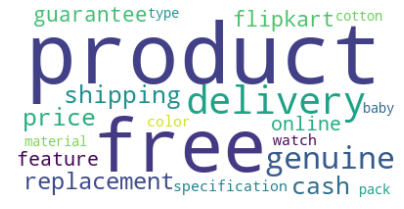

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wc = WordCloud(background_color="white", mode="RGBA", max_words=20,collocations = False).generate(words)
plt.figure(figsize=[7,7])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [16]:
stopword_list  = nltk.corpus.stopwords.words('english') + most_common_words


(-0.5, 399.5, 199.5, -0.5)

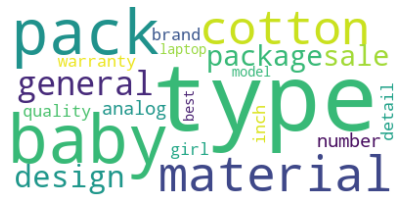

In [17]:
wc_stop = WordCloud(background_color="white", mode="RGBA", max_words=20,collocations = False,stopwords= stopword_list).generate(words)
plt.figure(figsize=[7,7])
plt.imshow(wc_stop, interpolation="bilinear")
plt.axis("off")

In [18]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = pd.Series(le.fit_transform(df1_test.categories),name='class_labels')

In [20]:
list_labels = y
list_tokens = tokenize_desc

In [21]:
list_tokens

0       [feature, elegance, polyester, multicolor, abs...
1       [specification, sathiyas, cotton, bath, towel,...
2       [feature, eurospa, cotton, terry, face, towel,...
3       [feature, santosh, royal, fashion, cotton, pri...
4       [feature, jaipur, print, cotton, floral, king,...
                              ...                        
1043    [oren, empower, extra, large, self, adhesive, ...
1044    [wallmantra, large, vinyl, sticker, sticker, p...
1045    [uberlyfe, extra, large, pigmented, polyvinyl,...
1046    [wallmantra, medium, vinyl, sticker, sticker, ...
1047    [uberlyfe, large, vinyl, sticker, online, uber...
Name: tokenize_desc, Length: 1048, dtype: object

In [22]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(df1_test.description,y, test_size=0.1, random_state=40)
X_train =df1_test.description
y_train = y

In [23]:
img_path = "/content/drive/MyDrive/P6_market_place/Images"
train = df1_test
labels = train.categories.unique()

dico = []
prob = []
for leaf in train.image:
    img = cv.imread(img_path +'/'+ str(leaf),cv.IMREAD_GRAYSCALE)
    orb = cv.ORB_create()
    kp = orb.detect(img,None)

    kp, des = orb.compute(img, kp)
    if len(kp)==0:
      prob.append(leaf)
      des= []
    


    for d in des:
      dico.append(d)

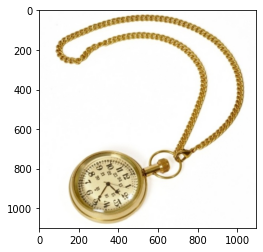

(<matplotlib.image.AxesImage at 0x7feabc79fb10>, None)

In [53]:
img_path = "/content/drive/MyDrive/P6_market_place/Images"
train = df1_test
labels = train.categories.unique()
name ='9833d0de7f7e1927c807411c10b19189'

img = cv.imread(img_path +'/'+ name+'.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img), plt.show()

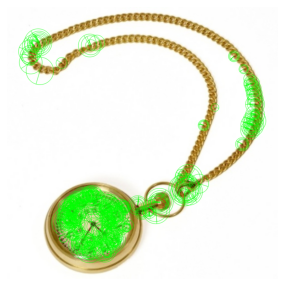

(<matplotlib.image.AxesImage at 0x7feabbcf8b10>, None)

In [68]:
img = cv.imread(img_path +'/'+ name+'.jpg',cv.IMREAD_GRAYSCALE)
orb = cv.ORB_create()
kp, des = orb.detectAndCompute(img, None)

img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=4)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(img2), plt.show()


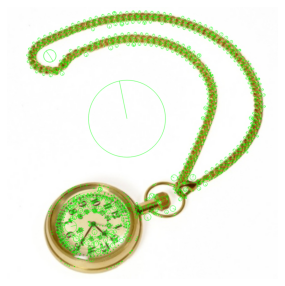

(<matplotlib.image.AxesImage at 0x7feabbcf34d0>, None)

In [70]:
sift = cv.xfeatures2d.SIFT_create()
kp,des = sift.detectAndCompute(img,None)
img3=cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=4)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.axis('off')

plt.imshow(img3), plt.show()

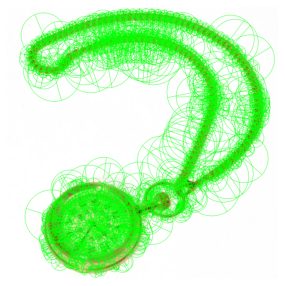

(<matplotlib.image.AxesImage at 0x7feaba7b3f90>, None)

In [72]:
surf = cv.xfeatures2d.SURF_create()
kp,des = surf.detectAndCompute(img,None)
img4=cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=4)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(img4), plt.show()


In [25]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier
k = np.size(labels) * 10

batch_size = np.size(os.listdir(img_path)) * 3
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, verbose=1).fit(dico)


Init 1/3 with method k-means++
Inertia for init 1/3: 1387650858.0
Init 2/3 with method k-means++
Inertia for init 2/3: 1401874584.0
Init 3/3 with method k-means++
Inertia for init 3/3: 1393841206.0
Minibatch step 1/15982: mean batch inertia: 147123.38253968253
Minibatch step 2/15982: mean batch inertia: 113325.89942983352, ewa inertia: 113325.89942983352
Minibatch step 3/15982: mean batch inertia: 110540.26315455104, ewa inertia: 113291.0403132056
Minibatch step 4/15982: mean batch inertia: 110278.03028320125, ewa inertia: 113253.33586881385
Minibatch step 5/15982: mean batch inertia: 108947.30232997946, ewa inertia: 113199.45068406599
Minibatch step 6/15982: mean batch inertia: 109959.95966644798, ewa inertia: 113158.91208389042
Minibatch step 7/15982: mean batch inertia: 108561.64698142196, ewa inertia: 113101.38246245406
Minibatch step 8/15982: mean batch inertia: 108678.02794158504, ewa inertia: 113046.02913707637
Minibatch step 9/15982: mean batch inertia: 108475.6498913882, ewa i

In [26]:
kmeans.verbose = False
histo_list = []

for leaf in train.image:
    img = cv.imread(img_path +'/'+ str(leaf) )
    kp, des = orb.detectAndCompute(img, None)

    histo = np.zeros(k)
    nkp = np.size(kp)

    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly

    histo_list.append(histo)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w+',stop_words=stopword_list)

bow = dict()
bow["train"] = (count_vectorizer.fit_transform(X_train), y_train)
#bow["test"]  = (count_vectorizer.transform(X_test), y_test)
print(bow["train"][0].shape)
#print(bow["test"][0].shape)

(1048, 4202)


In [28]:
X_train_word =count_vectorizer.fit_transform(X_train)

In [29]:
np.shape(X_train_word)

(1048, 4202)

In [30]:

X_train_word_df = pd.DataFrame.sparse.from_spmatrix(X_train_word)
X_train_image = pd.DataFrame(histo_list)
X = pd.concat([X_train_word_df,X_train_image],axis=1)

In [31]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


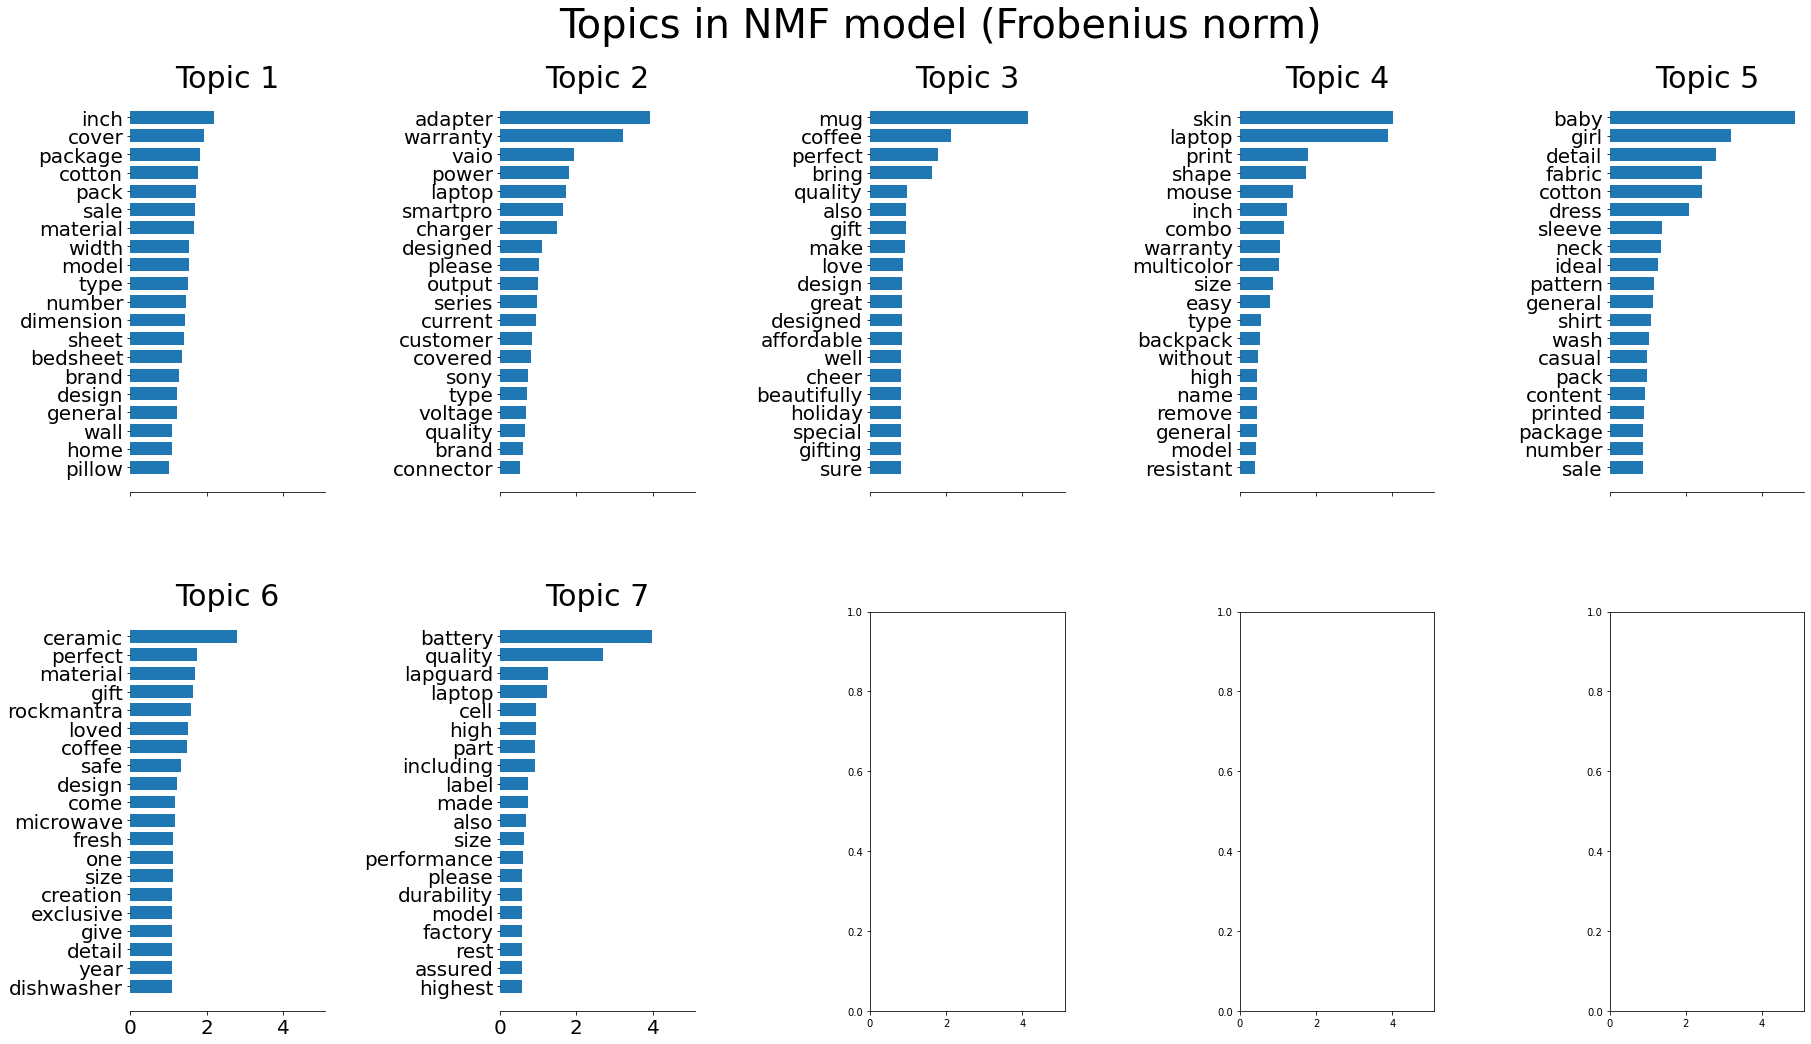

In [32]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
#n_samples = 2000
#n_features = 1000
n_components = 7
n_top_words = 20
nmf = NMF(n_components=n_components, random_state=1, alpha=0.1, l1_ratio=0.5).fit(X_train_word)
tfidf_feature_names = count_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


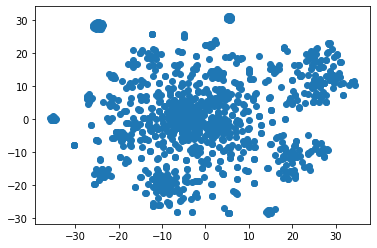

In [33]:
from sklearn.manifold import TSNE
tsne_2d = TSNE(n_components=2, perplexity=50)
X_tsne = tsne_2d.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

In [34]:
np.shape(X_tsne)

(1048, 2)

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
lr = LogisticRegression()
svc = SVC()
gb= GaussianNB()
nb = MultinomialNB()
from sklearn.model_selection import cross_val_score
cross_val_score(gb, X,y_train, cv=5, scoring='accuracy',error_score = 'raise')



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse co

array([0.80952381, 0.86190476, 0.86666667, 0.76076555, 0.68899522])

In [36]:
cross_val_score(lr, X,y_train, cv=5, scoring='accuracy',error_score = 'raise')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse co

array([0.93809524, 0.97619048, 0.9       , 0.72727273, 0.72248804])

In [37]:
cross_val_score(svc, X,y_train, cv=5, scoring='accuracy',error_score = 'raise')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse co

array([0.77142857, 0.82857143, 0.80952381, 0.61244019, 0.58373206])

In [38]:
labels_=gb.fit(X_tsne,y_train).predict(X_tsne)
gb_labels = pd.Series(labels_)

In [39]:
df1_test.categories.nunique()

7

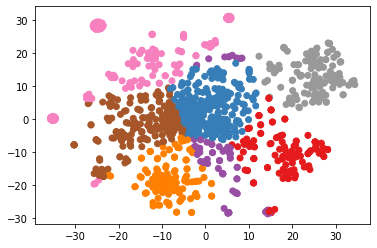

In [40]:
results = np.c_[X_tsne,labels_]
pd_result = pd.DataFrame(results)
plt.scatter(pd_result[0], pd_result[1], c=pd_result[2], cmap='Set1')

In [41]:
pd.crosstab(y_train,gb_labels)

col_0,0,1,2,3,4,5,6
class_labels,,,,,,,
0,81,37,0,1,23,8,0
1,12,97,15,4,21,1,0
2,20,76,21,12,13,7,0
3,6,7,10,94,13,18,1
4,3,23,19,6,86,13,0
5,5,22,4,3,22,94,0
6,0,2,0,0,0,0,148


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+',stop_words=stopword_list)

tfidf = dict()
tfidf["train"] = (tfidf_vectorizer.fit_transform(X_train), y_train)
#tfidf["test"]  = (tfidf_vectorizer.transform(X_test), y_test)

In [43]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

In [44]:
nb_classifier.fit(*bow["train"])

MultinomialNB()

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(nb_classifier, *bow["train"], cv=5, scoring='accuracy')

array([0.87619048, 0.95714286, 0.90952381, 0.74162679, 0.77511962])

In [46]:
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(*tfidf["train"])
cross_val_score(nb_classifier_tfidf, *tfidf["train"], cv=5, scoring='accuracy')

array([0.92857143, 0.97142857, 0.91428571, 0.72727273, 0.80382775])

In [47]:
#concat tfidf et vector_count
#kmeans pour retrouver les cat
#tsne pour reduc_dimension
#commencer le traitement d'image

Implémentation Kmeans


In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans()

In [49]:
kmeans= KMeans(n_clusters=df1_test.categories.nunique()).fit(X_tsne)

In [50]:
pd.crosstab(index=y_train, columns=kmeans.labels_)

col_0,0,1,2,3,4,5,6
class_labels,,,,,,,
0,81,35,0,17,0,0,17
1,6,100,3,8,4,2,27
2,29,68,0,4,15,5,28
3,8,22,3,7,89,14,6
4,0,36,0,84,16,0,14
5,4,16,0,39,3,58,30
6,0,1,147,0,0,0,2
